# Laboratorio 5 

+ Ana Laura Tschen 221645
+ Sebastian Garcia 22291

### 1. Implementación en Python de la función que grafica el campo de direcciones asociado a una ecuación diferencial de primer orden. Los parametros que recibe la función f son xmin, xmax, ymin, ymax de la ventana que se desea graficar y los parámetros xstep y ystep para indicar la separación en la que se quiere subdividir su gri de puntos sobre los ejes x y y. Tambien se influye el parámetro para graficar entre el campo F asociado a la ecuación definida anteriormente o el campo unitario N equivalente.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from sympy import symbols, Function, Eq, dsolve, diff, dsolve, simplify, Matrix, nroots, nsolve, S
from sympy import ln, exp
from sympy.utilities.lambdify import lambdify
from itertools import product

In [2]:
def plot_direction_field(f, xmin, xmax, ymin, ymax, xstep=20, ystep=20, unit=False, stream=False, title=None, ax=None, density=1.0):
 
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 5))
    else:
        fig = ax.figure

    X = np.linspace(xmin, xmax, xstep)
    Y = np.linspace(ymin, ymax, ystep)
    XX, YY = np.meshgrid(X, Y)

    U = np.ones_like(XX)
    V = f(XX, YY)

    if unit:
        L = np.sqrt(U**2 + V**2)
        L[L == 0] = 1.0
        U, V = U/L, V/L

    ax.quiver(XX, YY, U, V, pivot='mid', alpha=0.8)
    if stream:
        ax.streamplot(X, Y, U, V, density=density, color='k', linewidth=0.7, arrowsize=0.8)

    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    if title:
        ax.set_title(title)
    ax.grid(True, alpha=0.3)
    return fig, ax

Ejemplo A: $y' = -xy$

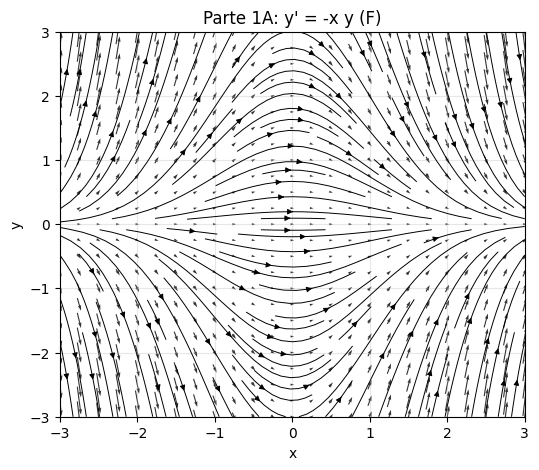

In [3]:
fA = lambda X, Y: -X*Y
fig1, ax1 = plot_direction_field(fA, xmin=-3, xmax=3, ymin=-3, ymax=3,
                                     xstep=25, ystep=25, unit=False, stream=True,
                                     density=1.2, title="Parte 1A: y' = -x y (F)")

Ejemplo B: $y'=y^2$ (unitario)

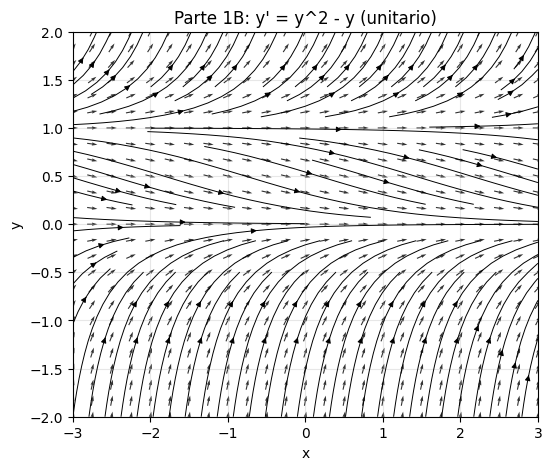

In [4]:
fB = lambda X, Y: Y**2 - Y
fig2, ax2 = plot_direction_field(fB, xmin=-3, xmax=3, ymin=-2, ymax=2,
                                     xstep=25, ystep=25, unit=True, stream=True,
                                     density=1.0, title="Parte 1B: y' = y^2 - y (unitario)")

### 2. Esbozo de las soluciones de la EDO, resolución de la EDO y comparación de la solución obtenida contra la solución esbozada.
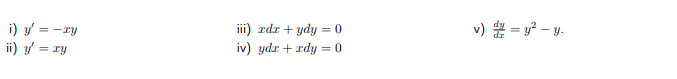

In [5]:
def symbolic_solutions_part2():
    x = symbols('x')
    y = Function('y')

    sols = {}

    # i) y' = -x y
    ode_i = Eq(diff(y(x), x), -x*y(x))
    sols['i'] = simplify(dsolve(ode_i))

    # ii) y' = x y
    ode_ii = Eq(diff(y(x), x), x*y(x))
    sols['ii'] = simplify(dsolve(ode_ii))

    # iii) x dx + y dy = 0  
    sols['iii'] = "x^2 + y^2 = C (circunferencias concéntricas)"

    # iv) y dx + x dy = 0 
    sols['iv'] = "x*y = C (hipérbolas)"

    # v) y' = y^2 - y = y(y-1) (separable)
    # ∫ dy/[y(y-1)] = ∫ dx  => ln|y/(y-1)| = x + C  => y = 1/(1 + K e^{-x})
    C = symbols('C')
    sols['v'] = "y(x) = 1 / (1 + K*exp(-x))"

    return sols

In [6]:
sols2 = symbolic_solutions_part2()
print("Parte 2) Soluciones simbólicas:")
for k, v in sols2.items():
    print(f"{k}) {v}")

Parte 2) Soluciones simbólicas:
i) Eq(y(x), C1*exp(-x**2/2))
ii) Eq(y(x), C1*exp(x**2/2))
iii) x^2 + y^2 = C (circunferencias concéntricas)
iv) x*y = C (hipérbolas)
v) y(x) = 1 / (1 + K*exp(-x))


R: Las soluciones simbólicas son las siguientes:
+ i) $C_{1}*e^{\frac{-x^{2}}{2}}$

### 3. Resolución de la ecuación diferencial $xy''+2y' = 6x$ por medio de la sustitución adecuada. Indicar la región del plano R2 en donde vale el teorema de existencia y unicidad, indicando aquellas regiones en donde no se cumplen. Analizar los puntos donde no se cumple el teorema y lo que ocurre con las soluciones.

## 4. Problema de valor inicial y campo de direcciones

Considere el siguiente problema de valor inicial:

$$
\frac{dy}{dx} = \frac{x - 3y - 3(x^2 - y^2) + 3xy}{2x - y + 3(x^2 - y^2) + 2xy}, \quad y(1.5) = 0. \tag{3}
$$

### a) 
Graficar el campo de direcciones de la EDO anterior.

### b) 
A partir del campo de direcciones, esbozar la solución del problema de valor inicial (3), y agregar la curva solución al plot del campo de direcciones.

### c) 
Hallar numéricamente los puntos de equilibrio de la EDO anterior, que son aquellos puntos en donde el campo de direcciones $F(x, y) = 0$ es el vector nulo. Para ello, es necesario resolver numéricamente el sistema de ecuaciones:

$$
\begin{aligned}
x - 3y - 3(x^2 - y^2) + 3xy &= 0, \\
2x - y + 3(x^2 - y^2) + 2xy &= 0.
\end{aligned}
$$

Resultados de búsqueda de puntos de equilibrio:

Condición inicial (0, 0)  ->  Punto de equilibrio (np.float64(0.0), np.float64(0.0))
Condición inicial (1, 1)  ->  Punto de equilibrio (np.float64(0.412478), np.float64(0.638639))
Condición inicial (1, -1)  ->  Punto de equilibrio (np.float64(1.386977), np.float64(-1.41775))
Condición inicial (-2, -2)  ->  Punto de equilibrio (np.float64(-0.466121), np.float64(-0.220889))


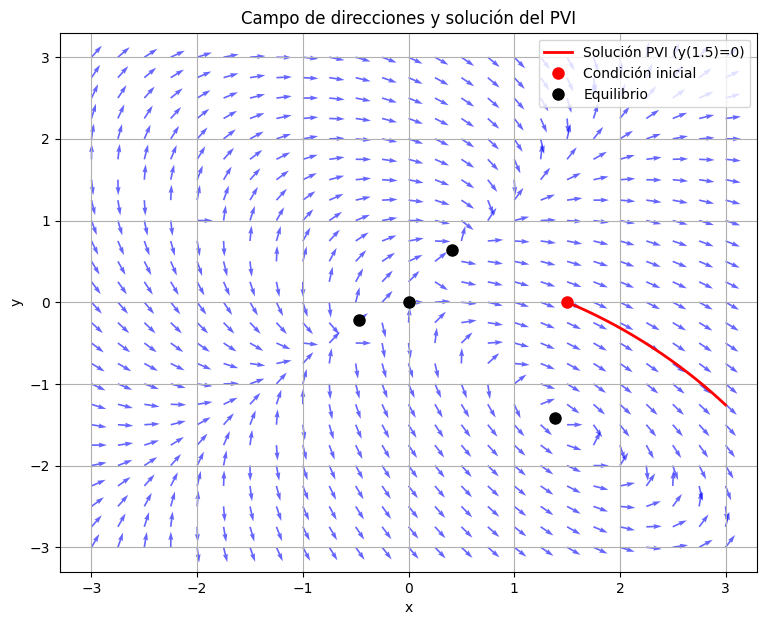


Lista final de puntos de equilibrio encontrados:
(np.float64(0.0), np.float64(0.0))
(np.float64(0.412478), np.float64(0.638639))
(np.float64(1.386977), np.float64(-1.41775))
(np.float64(-0.466121), np.float64(-0.220889))


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

# Definimos la EDO
def dydx(x, y):
    num = x - 3*y - 3*(x**2 - y**2) + 3*x*y
    den = 2*x - y + 3*(x**2 - y**2) + 2*x*y
    # Evitar divisiones por cero
    return np.divide(num, den, out=np.zeros_like(num, dtype=float), where=den!=0)

# a) Campo de direcciones
X, Y = np.meshgrid(np.linspace(-3, 3, 25), np.linspace(-3, 3, 25))
U = np.ones_like(X)  # dx = 1
V = dydx(X, Y)       # dy = f(x,y)

# Normalizamos
N = np.sqrt(U**2 + V**2)
U2, V2 = U/N, V/N

plt.figure(figsize=(9,7))
plt.quiver(X, Y, U2, V2, angles="xy", color="blue", alpha=0.6)

# b) Resolver el PVI
x0, y0 = 1.5, 0
sol = solve_ivp(dydx, [1.5, 3], [0], dense_output=True, max_step=0.05)
x_vals = np.linspace(1.5, 3, 300)
y_vals = sol.sol(x_vals)[0]

plt.plot(x_vals, y_vals, 'r', linewidth=2, label="Solución PVI (y(1.5)=0)")
plt.plot(x0, y0, 'ro', markersize=8, label="Condición inicial") 

plt.title("Campo de direcciones y solución del PVI")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()

# c) Puntos de equilibrio 
def sistema(vars):
    x, y = vars
    f1 = x - 3*y - 3*(x**2 - y**2) + 3*x*y
    f2 = 2*x - y + 3*(x**2 - y**2) + 2*x*y
    return [f1, f2]

semillas = [(0,0), (1,1), (-1,1), (1,-1), (2,0), (0,2), (-2,-2), (2,2)]
equilibrios = []

print("Resultados de búsqueda de puntos de equilibrio:\n")
for s in semillas:
    sol = fsolve(sistema, s)
    punto = tuple(np.round(sol, 6))
    if punto not in equilibrios:
        equilibrios.append(punto)
        print(f"Condición inicial {s}  ->  Punto de equilibrio {punto}")
        # puntos de equilibrio en la gráfica
        plt.plot(punto[0], punto[1], 'ko', markersize=8, label="Equilibrio" if len(equilibrios)==1 else "")

plt.legend()
plt.show()

print("\nLista final de puntos de equilibrio encontrados:")
for p in equilibrios:
    print(p)


## 5. Modelo de población animal

Considere una población de una especie de animales $P(t)$ que se modela por la ecuación diferencial:

$$
\frac{dP}{dt} = 0.0004P^2 - 0.06P. \tag{4}
$$

Suponga que la escala de tiempo $t$ se mide en semanas, mientras que la escala de la población $P$ se mide en individuos (número de individuos).

### a)
Determinar las dimensionales correctas de los parámetros $0.0004$ y $0.06$.

### b)
Hacer un análisis de los puntos de equilibrio de la EDO (4), y clasificarlos de acuerdo a si son estables, inestables o semi-estables.

### c)
Derivado del análisis anterior, hacer un esbozo de las soluciones $P(t)$, indicando la región donde dichas soluciones son constantes, crecientes o decrecientes, y las regiones donde las soluciones $P(t)$ tienen concavidad positiva, negativa o tiene máximos o mínimos.

### d)
Suponga que la población en el tiempo $t = 0$ es $P(0) = 200$ individuos. Describir cuál será el comportamiento a futuro de $P(t)$ si la población se rige por el modelo (4).

### e)
Repetir el análisis cualitativo en (d) asumiendo que la población en el tiempo $t = 0$ es $P(0) = 100$ individuos.

### f)
Resolver EDO (4) y graficar las curvas solución de los problemas en (d) y (e), para mostrar en la gráfica que la solución coincide con la descripción de su análisis cualitativo.

Puntos de equilibrio: [0, 150.0]
Clasificación:
  P=0 es ESTABLE
  P=150.0 es INESTABLE

Concavidad cambia en P =  75.0


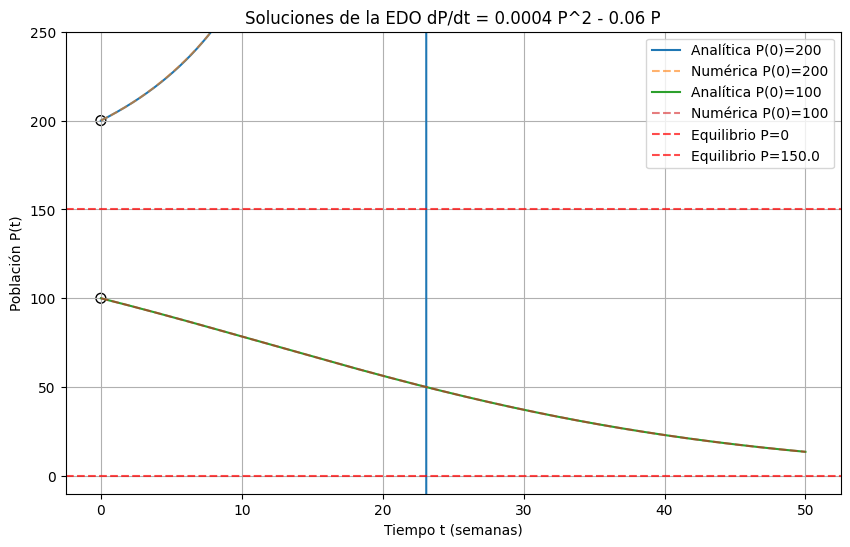

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros del modelo
a = 0.0004  # 1/(individuo·semana)
b = 0.06    # 1/semana

# EDO: dP/dt = a P^2 - b P
def dP_dt(t, P):
    return a * P**2 - b * P

# Solución analítica (separación de variables)
def P_analitica(t, P0):
    C = (a*P0 - b) / P0
    return b / (a - C*np.exp(b*t))

# ========================
# a) Análisis dimensional
# dP/dt: individuos/semana
# a: 1/(individuo·semana)
# b: 1/semana
# ========================

# b) Puntos de equilibrio
equilibrios = [0, b/a]
print("Puntos de equilibrio:", equilibrios)
print("Clasificación:")
for P_eq in equilibrios:
    fprime = 2*a*P_eq - b
    if fprime < 0:
        print(f"  P={P_eq} es ESTABLE")
    elif fprime > 0:
        print(f"  P={P_eq} es INESTABLE")
    else:
        print(f"  P={P_eq} es SEMIESTABLE")

# c) Concavidad y cualitativo:
print("\nConcavidad cambia en P = ", b/(2*a))

# d) y e) Condiciones iniciales
P0_vals = [200, 100]
t_eval = np.linspace(0, 50, 1000)

plt.figure(figsize=(10,6))

for P0 in P0_vals:
    # Solución analítica
    P_sol = P_analitica(t_eval, P0)
    
    # Solución numérica para comparar
    sol = solve_ivp(dP_dt, [0, 50], [P0], t_eval=t_eval)
    
    # Graficar analítica
    plt.plot(t_eval, P_sol, label=f"Analítica P(0)={P0}")
    # Graficar numérica con línea punteada
    plt.plot(sol.t, sol.y[0], "--", alpha=0.6, label=f"Numérica P(0)={P0}")
    # Marcar condición inicial
    plt.scatter(0, P0, s=50, edgecolors="k", facecolors="none")

# Líneas de equilibrio
for eq in equilibrios:
    plt.axhline(eq, color="red", linestyle="--", alpha=0.7, label=f"Equilibrio P={eq}")

plt.ylim(-10, 250)
plt.xlabel("Tiempo t (semanas)")
plt.ylabel("Población P(t)")
plt.title("Soluciones de la EDO dP/dt = 0.0004 P^2 - 0.06 P")
plt.legend()
plt.grid(True)
plt.show()


INCISO (a) — Unidades:
  dP/dt: individuos / semana
  a (0.0004) -> unidades: 1/(individuo * semana)
  b (0.06)   -> unidades: 1/semana

INCISO (b) — Equilibrios y clasificación:
  P = 0  -> f'(P) = -0.06  -> estable
  P = 150  -> f'(P) = 0.06  -> inestable

INCISO (c) — Cualitativo:
  - f(P) < 0 para 0 < P < 150; f(P) > 0 para P > 150.
  - f'(P) = 0 en P = 75 (cambio de concavidad).
  - d2P/dt2 = f'(P) * f(P), intervalos:
    0 < P < 75: concavidad hacia arriba
    75 < P < 150: concavidad hacia abajo
    P > 150: concavidad hacia arriba


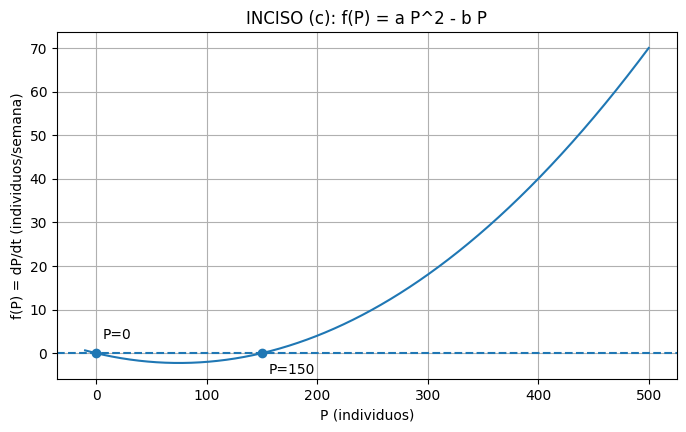


INCISO (d) — P(0) = 200.0
  C = 1.000000e-04
  C > 0 -> singularidad en t* = 23.1049 semanas (P -> +∞).


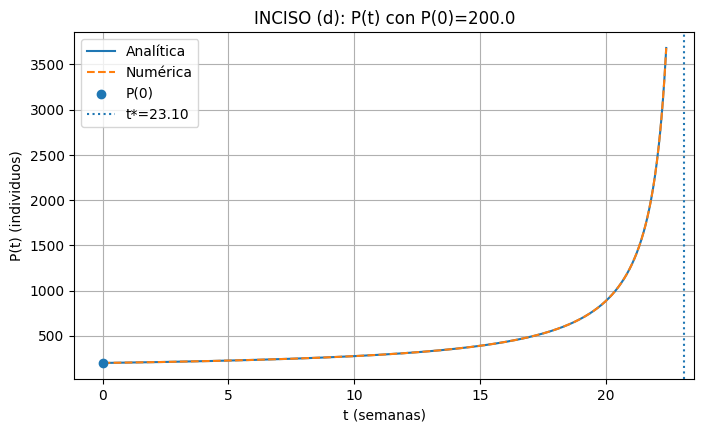


INCISO (e) — P(0) = 100.0
INCISO (d) — P(0) = 100.0
  C = -2.000000e-04
  C <= 0 -> no hay singularidad; P(t)->0 cuando t->∞.


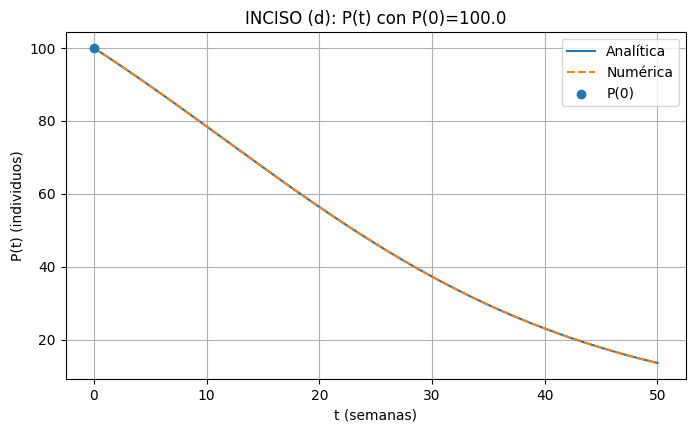


INCISO (f) — Comparación soluciones para P0 = (200.0, 100.0)
INCISO (d) — P(0) = 200.0
  C = 1.000000e-04
  C > 0 -> singularidad en t* = 23.1049 semanas (P -> +∞).
INCISO (d) — P(0) = 100.0
  C = -2.000000e-04
  C <= 0 -> no hay singularidad; P(t)->0 cuando t->∞.


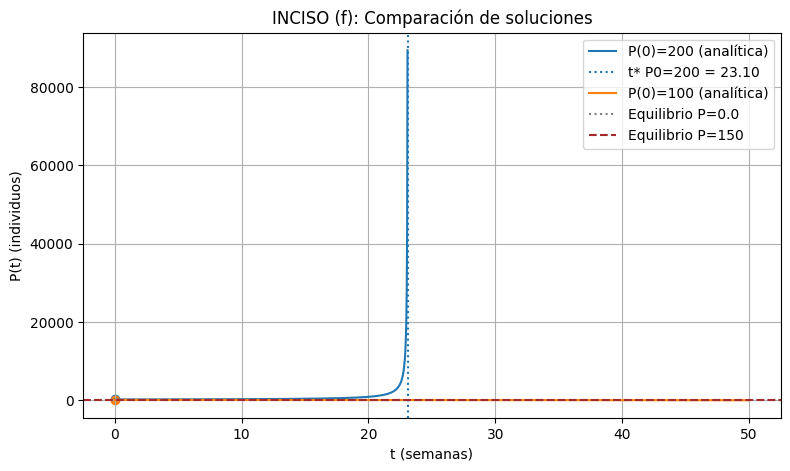

In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros
a = 0.0004   
b = 0.06    



# Modelo
def f(P):
    # acepta P escalar o vector
    return a * P**2 - b * P

def fprime(P):
    return 2 * a * P - b

# ---------- Inciso (a) ----------
def inciso_a():
    print("INCISO (a) — Unidades:")
    print("  dP/dt: individuos / semana")
    print("  a (0.0004) -> unidades: 1/(individuo * semana)")
    print("  b (0.06)   -> unidades: 1/semana")
    return {"dP_dt": "individuos/semana", "a": "1/(individuo*semana)", "b": "1/semana"}

# ---------- Inciso (b) ----------
def inciso_b():
    P_eq1 = 0.0
    P_eq2 = b / a
    def classify(P_eq):
        val = fprime(P_eq)
        if val < 0: return "estable"
        if val > 0: return "inestable"
        return "semi-estable"
    classification = {P_eq1: classify(P_eq1), P_eq2: classify(P_eq2)}
    print("INCISO (b) — Equilibrios y clasificación:")
    for p, cls in classification.items():
        print(f"  P = {p:.6g}  -> f'(P) = {fprime(p):.6g}  -> {cls}")
    return {"equilibrios": [P_eq1, P_eq2], "clasificacion": classification}

# ---------- Inciso (c) ----------
def inciso_c(plot=True):
    P_eq1 = 0.0
    P_eq2 = b / a
    P_fp_zero = b / (2 * a)
    print("INCISO (c) — Cualitativo:")
    print(f"  - f(P) < 0 para 0 < P < {P_eq2:.6g}; f(P) > 0 para P > {P_eq2:.6g}.")
    print(f"  - f'(P) = 0 en P = {P_fp_zero:.6g} (cambio de concavidad).")
    print("  - d2P/dt2 = f'(P) * f(P), intervalos:")
    print(f"    0 < P < {P_fp_zero:.6g}: concavidad hacia arriba")
    print(f"    {P_fp_zero:.6g} < P < {P_eq2:.6g}: concavidad hacia abajo")
    print(f"    P > {P_eq2:.6g}: concavidad hacia arriba")

    if plot:
        Pmax = max(2*P_eq2, 500)
        P_grid = np.linspace(-10, Pmax, 2000)
        f_grid = f(P_grid)
        plt.figure(figsize=(8,4.5))
        plt.plot(P_grid, f_grid)
        plt.axhline(0, linestyle="--")
        plt.scatter([P_eq1, P_eq2], [0,0], marker='o', zorder=5)
        plt.annotate(f"P={P_eq1:.0f}", (P_eq1,0), xytext=(5,10), textcoords="offset points")
        plt.annotate(f"P={P_eq2:.0f}", (P_eq2,0), xytext=(5,-15), textcoords="offset points")
        plt.xlabel("P (individuos)")
        plt.ylabel("f(P) = dP/dt (individuos/semana)")
        plt.title("INCISO (c): f(P) = a P^2 - b P")
        plt.grid(True)
        plt.show()

    return {"P_fp_zero": P_fp_zero, "P_eq": (P_eq1, P_eq2)}

def analytic_P_array(t_array, P0):
    C = (a * P0 - b) / P0
    if C > 0:
        # tiempo de singularidad
        t_star = (1.0 / b) * math.log(a / C)
        mask = t_array < 0.999 * t_star
        P_vals = np.full_like(t_array, np.nan, dtype=float)
        if np.any(mask):
            with np.errstate(over='ignore', divide='ignore', invalid='ignore'):
                denom = a - C * np.exp(b * t_array[mask])
                P_vals[mask] = b / denom
        return P_vals, C, t_star
    else:
        with np.errstate(over='ignore', divide='ignore', invalid='ignore'):
            denom = a - C * np.exp(b * t_array)
            P_vals = b / denom
        return P_vals, C, None

# ---------- Inciso (d) ----------
def inciso_d(P0=200.0, plot=True):
    print(f"INCISO (d) — P(0) = {P0}")
    C = (a * P0 - b) / P0
    print(f"  C = {C:.6e}")
    if C > 0:
        t_star = (1.0 / b) * math.log(a / C)
        print(f"  C > 0 -> singularidad en t* = {t_star:.6g} semanas (P -> +∞).")
        t_end = 0.97 * t_star
    else:
        print("  C <= 0 -> no hay singularidad; P(t)->0 cuando t->∞.")
        t_end = 50.0

    t_eval = np.linspace(0, t_end, 1200)
    P_analytic, C, t_star = analytic_P_array(t_eval, P0)

    def dPdt(t, y):
        return f(y)
    sol = solve_ivp(dPdt, [0, t_end], [P0], t_eval=t_eval, max_step=(t_end/1000)+1e-6)

    if plot:
        plt.figure(figsize=(8,4.5))
        plt.plot(t_eval, P_analytic, label="Analítica")
        plt.plot(sol.t, sol.y[0], '--', label="Numérica")
        plt.scatter([0.0], [P0], marker='o', zorder=5, label="P(0)")
        if t_star is not None:
            plt.axvline(t_star, linestyle=':', label=f"t*={t_star:.2f}")
        plt.xlabel("t (semanas)")
        plt.ylabel("P(t) (individuos)")
        plt.title(f"INCISO (d): P(t) con P(0)={P0}")
        plt.grid(True)
        plt.legend()
        plt.show()
       
    return {"P0": P0, "C": C, "t_star": t_star, "t_eval": t_eval, "P_analytic": P_analytic, "sol": sol}

# ---------- Inciso (e) ----------
def inciso_e(P0=100.0, plot=True):
    print(f"INCISO (e) — P(0) = {P0}")
    return inciso_d(P0=P0, plot=plot)  

# ---------- Inciso (f) ----------
def inciso_f(P0_list=(200.0, 100.0), plot=True):
    print("INCISO (f) — Comparación soluciones para P0 =", P0_list)
    results = [inciso_d(P0=p, plot=False) for p in P0_list]
    t_star_vals = [r["t_star"] for r in results]
    t_plot_end = 50.0
    for ts in t_star_vals:
        if ts is not None:
            t_plot_end = max(t_plot_end, 0.97*ts)
    t_plot = np.linspace(0, t_plot_end, 1600)

    plt.figure(figsize=(9,5))
    for r in results:
        P_vals, C, t_star = analytic_P_array(t_plot, r["P0"])
        plt.plot(t_plot, P_vals, label=f"P(0)={int(r['P0'])} (analítica)")
        plt.scatter([0.0], [r['P0']], marker='o')
        if t_star is not None:
            plt.axvline(t_star, linestyle=':', label=f"t* P0={int(r['P0'])} = {t_star:.2f}")

    # equilibrios horizontales
    P_eq1 = 0.0
    P_eq2 = b / a
    plt.axhline(P_eq1, color='gray', linestyle=':', label=f'Equilibrio P={P_eq1}')
    plt.axhline(P_eq2, color='brown', linestyle='--', label=f'Equilibrio P={int(P_eq2)}')

    plt.xlabel("t (semanas)")
    plt.ylabel("P(t) (individuos)")
    plt.title("INCISO (f): Comparación de soluciones")
    plt.grid(True)
    plt.legend()
    if plot:
        plt.show()
       
    return {"t_plot": t_plot, "results": results}


res_a = inciso_a()
print()
res_b = inciso_b()
print()
res_c = inciso_c(plot=True)
print()
res_d = inciso_d(P0=200.0, plot=True)
print()
res_e = inciso_e(P0=100.0, plot=True)
print()
res_f = inciso_f(P0_list=(200.0, 100.0), plot=True)


